# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set correct working directory
wd = os.getcwd()
print("Current working directory: ", wd)
if wd[-9:] == "notebooks": wd = wd[:-10]
else: print("Make sure your working directory is set to the student-performance folder!")
os.chdir(wd)
print("New working directory: ", os.getcwd())
from utils.loader_steve import load_all_X_y, load_all_as_dict_pd, load_all_as_dict_np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

def train(model, X_train, y_train, stdscaler = True, normalizer = False, bl_smote = False):
    pipeline_inputs = []
    if bl_smote:
        sm = BorderlineSMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=10, m_neighbors=20, kind='borderline-1')
        X_train, y_train = sm.fit_resample(X_train, y_train)
    if stdscaler:
        pipeline_inputs.append(StandardScaler())
    if normalizer:
        pipeline_inputs.append(Normalizer())
    pipeline_inputs.append(model)
    model_pp = make_pipeline(*pipeline_inputs)
    model_pp.fit(X_train, y_train)
    return model_pp



Current working directory:  /Users/marvin/workspace/kaggle_gameplay/student-performance/notebooks
New working directory:  /Users/marvin/workspace/kaggle_gameplay/student-performance


# Load & Prepare Data

In [3]:
# X
df = pd.read_csv("data/processed/df_5_12_flattened.csv", index_col=0)
X = df.iloc[:, 2:].values
# X = np.delete(X, 61, 1)

# y
labels = pd.read_csv("data/processed/labels_q4-13.csv")
y = labels['correct'][labels['q'] == 10].values

# Creating training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
 
# Feature Scaling
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

def eval_model(model, cm_title: str, X_test: np.ndarray, y_test: np.ndarray, output: bool = True):
    # Model evalutation
    y_pred = model.predict(X_test)
    # print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

    if output:
        cm = confusion_matrix(y_test, y_pred)
        hp = sns.heatmap(cm, annot=True, fmt='d')
        hp.set_title(f"Confusion matrix of {cm_title}") 
        hp.set(xlabel='Predicted', ylabel='Actual')

        print(classification_report(y_test,y_pred))

    return y_pred

In [4]:
df_added_var = pd.read_csv('data/processed/df_added_variables.csv', nrows=30000)

pd.plotting.scatter_matrix(df_added_var, alpha=0.2, figsize=(15,15))

array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='session_id', ylabel='Unnamed: 0'>,
        <Axes: xlabel='index', ylabel='Unnamed: 0'>,
        <Axes: xlabel='elapsed_time', ylabel='Unnamed: 0'>,
        <Axes: xlabel='level', ylabel='Unnamed: 0'>,
        <Axes: xlabel='page', ylabel='Unnamed: 0'>,
        <Axes: xlabel='room_coor_x', ylabel='Unnamed: 0'>,
        <Axes: xlabel='room_coor_y', ylabel='Unnamed: 0'>,
        <Axes: xlabel='screen_coor_x', ylabel='Unnamed: 0'>,
        <Axes: xlabel='screen_coor_y', ylabel='Unnamed: 0'>,
        <Axes: xlabel='hover_duration', ylabel='Unnamed: 0'>,
        <Axes: xlabel='fullscreen', ylabel='Unnamed: 0'>,
        <Axes: xlabel='hq', ylabel='Unnamed: 0'>,
        <Axes: xlabel='music', ylabel='Unnamed: 0'>,
        <Axes: xlabel='difference_clicks', ylabel='Unnamed: 0'>,
        <Axes: xlabel='screen_distance_clicks', ylabel='Unnamed: 0'>,
        <Axes: xlabel='distance_clicks', ylabel='Unnamed: 0'>,
     

# Kernel SVM

[LibSVM]..................*..*
optimization finished, #iter = 20308
obj = -12661.606949, rho = -0.100792
nSV = 14140, nBSV = 9000
Total nSV = 14140
              precision    recall  f1-score   support

           0       0.62      0.52      0.56      3496
           1       0.59      0.69      0.64      3573

    accuracy                           0.61      7069
   macro avg       0.61      0.60      0.60      7069
weighted avg       0.61      0.61      0.60      7069



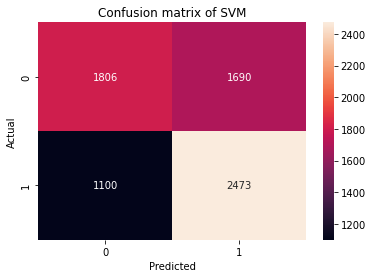

In [ ]:
# Training a SVM classifier using SVC class
svm = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', verbose=True)
svm_pipe = make_pipeline(StandardScaler(), svm)
svm_pipe.fit(X_train, y_train)
 
eval_model(svm_pipe, "SVM")

# Linear SVM

[LibLinear].............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/Applications/anaconda3/envs/kaggle_gameplay/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


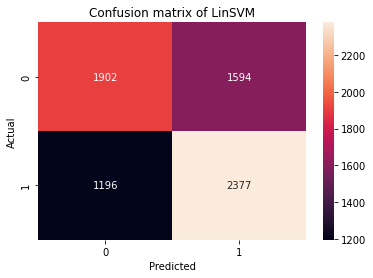

In [ ]:
# Supposed to scale better for large datasets

# Training a SVM classifier using SVC class
lsvm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=1.0, class_weight='balanced', verbose=True, max_iter=-1)
lsvm_pipe = make_pipeline(StandardScaler(), lsvm)
lsvm_pipe.fit(X_train, y_train)
 
eval_model(lsvm_pipe, "LinSVM")

# SGD Classifier (SVM, LogReg, Perceptron)

## Linear SVM - hinge loss - SGD

-- Epoch 1
Norm: 21.69, NNZs: 169, Bias: 0.826581, T: 16493, Avg. loss: 9.309397
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 9.93, NNZs: 169, Bias: 0.112286, T: 32986, Avg. loss: 2.025975
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 7.23, NNZs: 169, Bias: -0.391795, T: 49479, Avg. loss: 1.512738
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 5.17, NNZs: 169, Bias: 0.234477, T: 65972, Avg. loss: 1.295663
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 4.48, NNZs: 169, Bias: -0.144978, T: 82465, Avg. loss: 1.192341
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 6.71, NNZs: 169, Bias: 0.493745, T: 98958, Avg. loss: 1.172410
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 4.08, NNZs: 169, Bias: -0.000809, T: 115451, Avg. loss: 1.139418
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 3.74, NNZs: 169, Bias: 0.032750, T: 131944, Avg. loss: 1.046960
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 3.48, NNZs: 169, Bias: 0.048781, T: 148437, Avg. loss: 1.

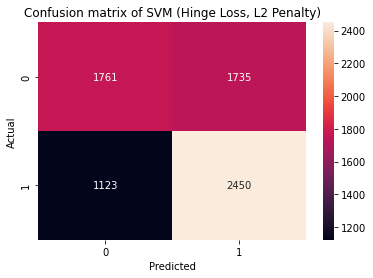

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
sgdc = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, class_weight='balanced', verbose=True)
clf = make_pipeline(StandardScaler(), sgdc)
clf.fit(X_train, y_train)

eval_model(clf, "SVM (Hinge Loss, L2 Penalty)")

## Logistic Regression - log loss - SGD

-- Epoch 1
Norm: 199.53, NNZs: 169, Bias: 3.439981, T: 16493, Avg. loss: 62.732755
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 172.07, NNZs: 169, Bias: 15.707437, T: 32986, Avg. loss: 14.284131
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 94.28, NNZs: 169, Bias: 1.234458, T: 49479, Avg. loss: 8.388425
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 61.90, NNZs: 169, Bias: -3.075420, T: 65972, Avg. loss: 5.440744
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 47.30, NNZs: 169, Bias: -0.469232, T: 82465, Avg. loss: 3.869142
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 40.70, NNZs: 169, Bias: 1.285411, T: 98958, Avg. loss: 3.188025
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 33.90, NNZs: 169, Bias: -1.449457, T: 115451, Avg. loss: 2.749269
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 29.67, NNZs: 169, Bias: -1.396591, T: 131944, Avg. loss: 2.355139
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 27.10, NNZs: 169, Bias: -1.138700, T: 148437

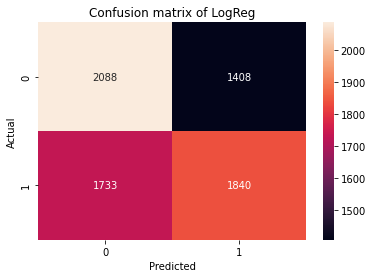

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
sgdc = SGDClassifier(loss='log_loss', verbose=True)
clf = make_pipeline(StandardScaler(), sgdc)
clf.fit(X_train, y_train)

eval_model(clf, "LogReg")

## Perceptron - elasticnet loss - SGD

-- Epoch 1
Norm: 224.79, NNZs: 161, Bias: -3.356698, T: 16493, Avg. loss: 74.307709
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 155.50, NNZs: 147, Bias: 0.812639, T: 32986, Avg. loss: 11.150185
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 143.11, NNZs: 142, Bias: -0.070903, T: 49479, Avg. loss: 5.916094
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 133.85, NNZs: 121, Bias: -0.645392, T: 65972, Avg. loss: 3.837612
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 129.23, NNZs: 115, Bias: -1.091670, T: 82465, Avg. loss: 2.853638
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 124.50, NNZs: 116, Bias: -0.253726, T: 98958, Avg. loss: 1.993665
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 121.86, NNZs: 104, Bias: 0.084748, T: 115451, Avg. loss: 1.623557
Total training time: 0.15 seconds.
-- Epoch 8
Norm: 125.02, NNZs: 102, Bias: 0.930976, T: 131944, Avg. loss: 1.804988
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 119.82, NNZs: 82, Bias: 0.394634, T: 1

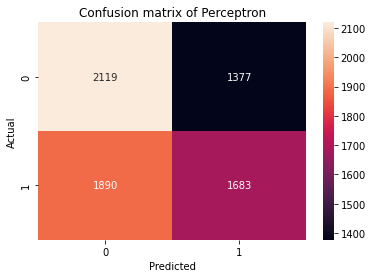

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
sgdc = SGDClassifier(loss='perceptron', penalty='elasticnet', verbose=True)
clf = make_pipeline(StandardScaler(), sgdc)
clf.fit(X_train, y_train)

eval_model(clf, "Perceptron")

# Decision Tree

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      3496
           1       0.54      0.55      0.54      3573

    accuracy                           0.54      7069
   macro avg       0.54      0.54      0.54      7069
weighted avg       0.54      0.54      0.54      7069



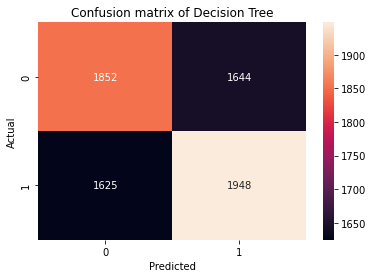

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
tree_pipe = make_pipeline(StandardScaler(), tree)
tree_pipe.fit(X_train, y_train)

eval_model(tree_pipe, "Decision Tree")

# Extra Randomized Tree

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      3496
           1       0.54      0.55      0.55      3573

    accuracy                           0.54      7069
   macro avg       0.54      0.54      0.54      7069
weighted avg       0.54      0.54      0.54      7069



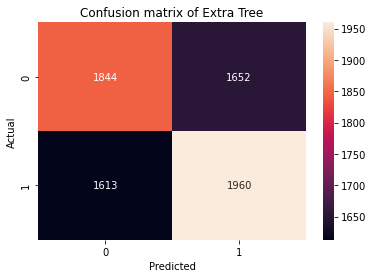

In [ ]:
etree = ExtraTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
etree_pipe = make_pipeline(StandardScaler(), etree)
etree_pipe.fit(X_train, y_train)

eval_model(etree_pipe, "Extra Tree")

# MLP

Iteration 1, loss = 0.67677027
Iteration 2, loss = 0.65794056
Iteration 3, loss = 0.64960788
Iteration 4, loss = 0.64277417
Iteration 5, loss = 0.63681041
Iteration 6, loss = 0.62920907
Iteration 7, loss = 0.62355338
Iteration 8, loss = 0.61673623
Iteration 9, loss = 0.60896743
Iteration 10, loss = 0.59867300
Iteration 11, loss = 0.58932403
Iteration 12, loss = 0.58104705
Iteration 13, loss = 0.57287657
Iteration 14, loss = 0.56331468
Iteration 15, loss = 0.55244332
Iteration 16, loss = 0.54190724
Iteration 17, loss = 0.53499637
Iteration 18, loss = 0.52472995
Iteration 19, loss = 0.51116219
Iteration 20, loss = 0.50575382
Iteration 21, loss = 0.49365321
Iteration 22, loss = 0.48142475
Iteration 23, loss = 0.47606619
Iteration 24, loss = 0.46282890
Iteration 25, loss = 0.45399648
Iteration 26, loss = 0.44940995
Iteration 27, loss = 0.43863428
Iteration 28, loss = 0.42960682
Iteration 29, loss = 0.43304283
Iteration 30, loss = 0.41836639
Iteration 31, loss = 0.40801761
Iteration 32, los

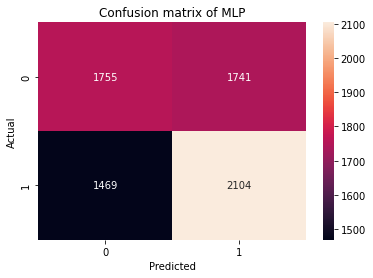

In [ ]:
mlp = MLPClassifier((50, 100, 50), activation='relu', verbose=True)
mlp = make_pipeline(StandardScaler(), mlp)
mlp.fit(X_train, y_train)

eval_model(mlp, "MLP")


# Gaussian Process Classifier

In [40]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

data_all, labels = load_all_X_y()
models = {}

for q in labels['q'].unique():

    # get X
    if q <= 3: df = data_all['0_4']
    elif q <= 13: df = data_all['5_12']
    elif q <= 18: df = data_all['13_22']
    # X = df.iloc[:, 2:]
    X = df[[ # 'distance_clicks_std_7', 
            'sum_distance_clicks_max_4', 
            'sum_distance_clicks_max_3', 
            'screen_distance_clicks_std_1', 
            'sum_distance_clicks_max_1', 
            'difference_clicks_max_5', 
            'index_sum_of_actions_5', 
            'distance_clicks_std_1', 
            # 'sum_distance_clicks_max_8', 
            # 'index_sum_of_actions_7'
            ]].values
    # get y
    y = labels['correct'][labels['q'] == q].values
    # Creating training and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    # Train model
    model = GaussianProcessClassifier()
    clf = train(model, X_train, y_train, True, False, False)
    # Get accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Trained model for question {q}, accuracy: {round(acc, 2)}, f1_score: {round(f1, 2)}")
    models[f"Question_{q}"] = {'model' : clf, 'acc': acc, 'f1_score': f1} 
    
print(f"Mean accuracy: {round(np.mean([models[q]['acc'] for q in models.keys()]), 2)}")
print(f"Mean f1_score: {round(np.mean([models[q]['f1_score'] for q in models.keys()]), 4)}")

Trained model for question 1, accuracy: 0.73, f1_score: 0.84
Trained model for question 2, accuracy: 0.98, f1_score: 0.99
Trained model for question 3, accuracy: 0.93, f1_score: 0.97
Trained model for question 4, accuracy: 0.8, f1_score: 0.89
Trained model for question 5, accuracy: 0.6, f1_score: 0.68
Trained model for question 6, accuracy: 0.78, f1_score: 0.87
Trained model for question 7, accuracy: 0.74, f1_score: 0.85
Trained model for question 8, accuracy: 0.62, f1_score: 0.76
Trained model for question 9, accuracy: 0.74, f1_score: 0.84
Trained model for question 10, accuracy: 0.58, f1_score: 0.62
Trained model for question 11, accuracy: 0.65, f1_score: 0.78
Trained model for question 12, accuracy: 0.86, f1_score: 0.93
Trained model for question 13, accuracy: 0.72, f1_score: 0.0
Trained model for question 14, accuracy: 0.71, f1_score: 0.83
Trained model for question 15, accuracy: 0.56, f1_score: 0.55
Trained model for question 16, accuracy: 0.73, f1_score: 0.85
Trained model for qu

# Function to predict for all questions

In [30]:
def train(model, X_train, y_train, stdscaler = True, normalizer = False, bl_smote = False):
    pipeline_inputs = []
    if bl_smote:
        sm = BorderlineSMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=10, m_neighbors=20, kind='borderline-1')
        X_train, y_train = sm.fit_resample(X_train, y_train)
    if stdscaler:
        pipeline_inputs.append(StandardScaler())
    if normalizer:
        pipeline_inputs.append(Normalizer())
    pipeline_inputs.append(model)
    model_pp = make_pipeline(*pipeline_inputs)
    model_pp.fit(X_train, y_train)
    return model_pp


### Test

In [34]:
data_all, labels = load_all_X_y()
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=1000, class_weight='balanced')
# DecisionTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
models = {}

for q in labels['q'].unique():

    # get X
    if q <= 3: df = data_all['0_4']
    elif q <= 13: df = data_all['5_12']
    elif q <= 18: df = data_all['13_22']
    X = df.iloc[:, 2:].values
    # get y
    y = labels['correct'][labels['q'] == q].values
    # Creating training and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    # Train model
    model = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
    clf = train(model, X_train, y_train, True, False, False)
    # Get accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Trained model for question {q}, accuracy: {round(acc, 2)}, f1_score: {round(f1, 2)}")
    models[f"Question_{q}"] = {'model' : clf, 'acc': acc, 'f1_score': f1} 
    
print(f"Mean accuracy: {round(np.mean([models[q]['acc'] for q in models.keys()]), 2)}")
print(f"Mean f1_score: {round(np.mean([models[q]['f1_score'] for q in models.keys()]), 4)}")

# Mean f1_score: 0.7248 (Decision Tree, standardized, not normalized, no SMOTE)
# Mean f1_score: 0.7216 (Decision Tree, standardized, normalized, no SMOTE)
# Mean f1_score: 0.7053 (Decision Tree, standardized, normalized, SMOTE)
# Mean f1_score: 0.7143 (Decision Tree, standardized, not normalized, SMOTE)
# Mean f1_score: 0.7170 (Decision Tree, not standardized, not normalized, SMOTE)

# Mean f1_score: 0.7451 (SVM(1.0, rbf, scaled), standardized, normalized, SMOTE)
# Mean f1_score: 0.7883 (SVM(1.0, rbf, scaled), standardized, not normalized, no SMOTE) - Q13: 0.0, Q15: 0.63

# Mean f1_score: 0.7072 (LogReg, standardized, not normalized, no SMOTE)
# Mean f1_score: 0.6943 (LogReg, standardized, normalized, SMOTE)

# Mean f1_score: 0.7327 (MLP(32, 64, 32), standardized, not normalized, no SMOTE)
# Mean f1_score: 0.7457 (MLP(100), standardized, not normalized, no SMOTE)

    

Trained model for question 1, accuracy: 0.65, f1_score: 0.76
Trained model for question 2, accuracy: 0.96, f1_score: 0.98
Trained model for question 3, accuracy: 0.88, f1_score: 0.93
Trained model for question 4, accuracy: 0.72, f1_score: 0.82
Trained model for question 5, accuracy: 0.55, f1_score: 0.59
Trained model for question 6, accuracy: 0.67, f1_score: 0.79
Trained model for question 7, accuracy: 0.64, f1_score: 0.76
Trained model for question 8, accuracy: 0.54, f1_score: 0.62
Trained model for question 9, accuracy: 0.64, f1_score: 0.75
Trained model for question 10, accuracy: 0.54, f1_score: 0.55
Trained model for question 11, accuracy: 0.56, f1_score: 0.66
Trained model for question 12, accuracy: 0.77, f1_score: 0.86
Trained model for question 13, accuracy: 0.63, f1_score: 0.33
Trained model for question 14, accuracy: 0.62, f1_score: 0.73
Trained model for question 15, accuracy: 0.54, f1_score: 0.52
Trained model for question 16, accuracy: 0.61, f1_score: 0.73
Trained model for

# Baseline Naive Classifier

## Gets dstribution of each question and applies it to each test data point

In [7]:
labels = pd.read_csv("data/processed/labels.csv")
models = {}

for q in labels['q'].unique():
    y_pred = []
    # get X
    X = data_all['0_4'].iloc[:, 2:].values
    # get y
    y = labels['correct'][labels['q'] == q].values
    # Creating training and test split
    _, _, _, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    # get distribution of y
    dist = np.unique(y_test, return_counts=True)[1]
    prob_0 = dist[0] / (dist[0] + dist[1])
    prob_1 = 1-prob_0
    # predict
    for val in y_test:
        r = np.random.default_rng().uniform(1)
        if r <= prob_0:
            y_pred.append(0)
        else:
            y_pred.append(1)

    # Get accuracy
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Trained model for question {q}, accuracy: {round(acc, 2)}, f1_score: {round(f1, 2)}")
    models[f"Question_{q}"] = {'model' : None, 'prob_0': prob_0, 'prob_1': prob_1, 'acc': acc, 'f1_score': f1}
    
print(f"Mean accuracy: {round(np.mean([models[q]['acc'] for q in models.keys()]), 4)}")
print(f"Mean f1_score: {round(np.mean([models[q]['f1_score'] for q in models.keys()]), 4)}")

Trained model for question 1, accuracy: 0.73, f1_score: 0.84
Trained model for question 2, accuracy: 0.98, f1_score: 0.99
Trained model for question 3, accuracy: 0.93, f1_score: 0.97
Trained model for question 4, accuracy: 0.8, f1_score: 0.89
Trained model for question 5, accuracy: 0.55, f1_score: 0.71
Trained model for question 6, accuracy: 0.78, f1_score: 0.87
Trained model for question 7, accuracy: 0.74, f1_score: 0.85
Trained model for question 8, accuracy: 0.62, f1_score: 0.76
Trained model for question 9, accuracy: 0.74, f1_score: 0.85
Trained model for question 10, accuracy: 0.51, f1_score: 0.67
Trained model for question 11, accuracy: 0.64, f1_score: 0.78
Trained model for question 12, accuracy: 0.86, f1_score: 0.93
Trained model for question 13, accuracy: 0.28, f1_score: 0.43
Trained model for question 14, accuracy: 0.71, f1_score: 0.83
Trained model for question 15, accuracy: 0.48, f1_score: 0.65
Trained model for question 16, accuracy: 0.73, f1_score: 0.85
Trained model for 

## Gets dstribution of each question and assigns all test points to majority class

In [32]:
labels = pd.read_csv("data/processed/labels.csv")
models = {}

for q in labels['q'].unique():
    # get X
    X = data_all['0_4'].iloc[:, 2:].values
    # get y
    y = labels['correct'][labels['q'] == q].values
    # Creating training and test split
    _, _, _, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    # get distribution of y
    dist = np.unique(y_test, return_counts=True)[1]
    prob_0 = dist[0] / (dist[0] + dist[1])
    if prob_0 > 0.5:
        y_pred = np.zeros(len(y_test))
    else:
        y_pred = np.ones(len(y_test))

    # Get accuracy
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Trained model for question {q}, accuracy: {round(acc, 2)}, f1_score: {round(f1, 2)}")
    models[f"Question_{q}"] = {'model' : None, 'prob_0': prob_0, 'prob_1': prob_1, 'acc': acc, 'f1_score': f1}
    
print(f"Mean accuracy: {round(np.mean([models[q]['acc'] for q in models.keys()]), 4)}")
print(f"Mean f1_score: {round(np.mean([models[q]['f1_score'] for q in models.keys()]), 4)}")

Trained model for question 1, accuracy: 0.73, f1_score: 0.84
Trained model for question 2, accuracy: 0.98, f1_score: 0.99
Trained model for question 3, accuracy: 0.93, f1_score: 0.97
Trained model for question 4, accuracy: 0.8, f1_score: 0.89
Trained model for question 5, accuracy: 0.55, f1_score: 0.71
Trained model for question 6, accuracy: 0.78, f1_score: 0.87
Trained model for question 7, accuracy: 0.74, f1_score: 0.85
Trained model for question 8, accuracy: 0.62, f1_score: 0.76
Trained model for question 9, accuracy: 0.74, f1_score: 0.85
Trained model for question 10, accuracy: 0.51, f1_score: 0.67
Trained model for question 11, accuracy: 0.64, f1_score: 0.78
Trained model for question 12, accuracy: 0.86, f1_score: 0.93
Trained model for question 13, accuracy: 0.72, f1_score: 0.0
Trained model for question 14, accuracy: 0.71, f1_score: 0.83
Trained model for question 15, accuracy: 0.52, f1_score: 0.0
Trained model for question 16, accuracy: 0.73, f1_score: 0.85
Trained model for qu

# SMOTE

In [12]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE

dict_X_y = load_all_as_dict_np()
X, y = dict_X_y[2]['X'], dict_X_y[2]['y']
print('Original dataset shape %s' % Counter(y))

sm = BorderlineSMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=10, m_neighbors=20, kind='borderline-1')
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 23063, 0: 499})
Resampled dataset shape Counter({1: 23063, 0: 23063})


# Feature Selection

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
X_dfs, labels = load_all_X_y()

[0.00886407 0.         0.00926577 0.         0.00987501 0.00441196
 0.00411278 0.00470547 0.01035997 0.01021989 0.01302638 0.01272762
 0.00958365 0.         0.00683746 0.01069974 0.01303652 0.01188938
 0.01342352 0.01109971 0.0098448  0.01179581 0.01307308 0.00962489
 0.00224074 0.0101086  0.         0.00895189 0.00814568 0.00950912
 0.01327822 0.01250322 0.00998015 0.00221833 0.00269857 0.00979709
 0.01349334 0.01215232 0.01119404 0.00979777 0.00999348 0.0117145
 0.01369863 0.00869681 0.00363269 0.00954569 0.00469242 0.0097162
 0.01085831 0.00972419 0.01157967 0.01156679 0.00931856 0.00374092
 0.01080911 0.00917218 0.01174793 0.01172896 0.01166919 0.00887115
 0.0094253  0.01176579 0.01323639 0.01135883 0.00400889 0.01224536
 0.00923386 0.01018173 0.01082453 0.01068057 0.01205946 0.01239292
 0.01179548 0.00370672 0.00969693 0.01032899 0.01179838 0.01251409
 0.01409293 0.01061481 0.01139608 0.0139887  0.01246008 0.00889607
 0.00531597 0.00701637 0.         0.00309648 0.01006133 0.014494

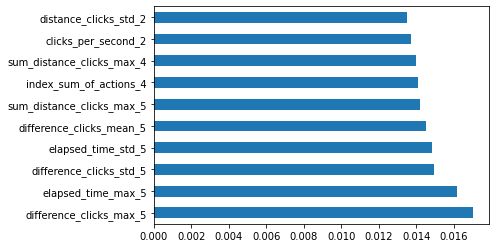

In [10]:
# Question 2
X = X_dfs['0_4'].iloc[:, 2:]
y = labels['correct'][labels['q'] == 2]
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

['difference_clicks_max_5' 'index_sum_of_actions_4'
 'sum_distance_clicks_max_4' 'elapsed_time_max_5' 'elapsed_time_std_5'
 'difference_clicks_std_5' 'difference_clicks_mean_5'
 'clicks_per_second_3' 'index_sum_of_actions_3' 'distance_clicks_mean_4']


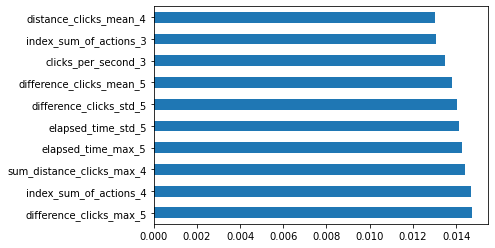

In [25]:
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(10).index.values)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
# all quesitons

dict_X_y = load_all_as_dict_pd()
top_ten = []
for i, data in enumerate(dict_X_y.values()):
    X = data['X']
    y = data['y']
    model = DecisionTreeClassifier()
    model.fit(X,y)
    print(f"Question {i+1} done")
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_ten.append(feat_importances.nlargest(10).index.values)
top_ten_nunique = np.unique(top_ten, return_counts=True)
final_ten_indices = np.argsort(top_ten_nunique[1])[-10:]
features10 = top_ten_nunique[0][final_ten_indices]
for i in range(10):
    print(f"{features10[i]}: {top_ten_nunique[1][final_ten_indices[i]]}")
print(features10)
# 2 min

Question 1 done
Question 2 done
Question 3 done
Question 4 done
Question 5 done
Question 6 done
Question 7 done
Question 8 done
Question 9 done
Question 10 done
Question 11 done
Question 12 done
Question 13 done
Question 14 done
Question 15 done
Question 16 done
Question 17 done
Question 18 done
distance_clicks_std_7: 4
sum_distance_clicks_max_4: 5
sum_distance_clicks_max_3: 5
screen_distance_clicks_std_1: 5
sum_distance_clicks_max_1: 5
difference_clicks_max_5: 5
index_sum_of_actions_5: 6
distance_clicks_std_1: 6
sum_distance_clicks_max_8: 7
index_sum_of_actions_7: 11
['distance_clicks_std_7' 'sum_distance_clicks_max_4'
 'sum_distance_clicks_max_3' 'screen_distance_clicks_std_1'
 'sum_distance_clicks_max_1' 'difference_clicks_max_5'
 'index_sum_of_actions_5' 'distance_clicks_std_1'
 'sum_distance_clicks_max_8' 'index_sum_of_actions_7']


In [28]:
# all quesitons
from sklearn.ensemble import ExtraTreesClassifier

dict_X_y = load_all_as_dict_pd()
top_ten = []
for i, data in enumerate(dict_X_y.values()):
    X = data['X']
    y = data['y']
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(f"Question {i+1} done")
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_ten.append(feat_importances.nlargest(10).index.values)
top_ten_nunique = np.unique(top_ten, return_counts=True)
final_ten_indices = np.argsort(top_ten_nunique[1])[-10:]
features10 = top_ten_nunique[0][final_ten_indices]
for i in range(10):
    print(f"{features10[i]}: {top_ten_nunique[1][final_ten_indices[i]]}")
# 2 min

model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
model fitted
text_fqid_6: 5
fqid_2: 6
fqid_8: 6
index_sum_of_actions_5: 6
room_fqid_7: 8
text_fqid_2: 9
index_sum_of_actions_7: 10
text_fqid_7: 10
sum_distance_clicks_max_7: 11
fqid_7: 12


In [12]:
from sklearn.feature_selection import r_regression

dict_X_y = load_all_as_dict_pd()
top_ten = []
i = 1
for data in dict_X_y.values():
    X = data['X']
    y = data['y']
    coefs = r_regression(X, y)
    coefs_i = np.argsort(coefs)
    top_ten.append(X.columns[coefs_i[-10:]])
    print(f"Question {i}:")
    for coef, col in zip(np.sort(coefs)[-3:], X.columns[coefs_i[-3:]]):
        print(f"{col}: pearson coef: {coef}")
        print(f"{col}: variance: {np.var(X[col])}")
        print(f"{col}: std: {np.std(X[col])}")
        print(f"{col}: mean: {np.mean(X[col])}")
        print("------------------------")
    i += 1
top_ten_nunique = np.unique(top_ten, return_counts=True)
final_ten_indices = np.argsort(top_ten_nunique[1])[-10:]
features10 = top_ten_nunique[0][final_ten_indices]
for i in range(10):
    print(f"{features10[i]}: {top_ten_nunique[1][final_ten_indices[i]]}")


Question 1:
distance_clicks_std_1: pearson coef: 0.06939237817116117
distance_clicks_std_1: variance: 1644.798095703125
distance_clicks_std_1: std: 40.55611038208008
distance_clicks_std_1: mean: 219.55126953125
------------------------
room_fqid_1: pearson coef: inf
room_fqid_1: variance: 0.0
room_fqid_1: std: 0.0
room_fqid_1: mean: 1.0
------------------------
room_fqid_5: pearson coef: inf
room_fqid_5: variance: 0.0
room_fqid_5: std: 0.0
room_fqid_5: mean: 2.0
------------------------
Question 2:
distance_clicks_mean_1: pearson coef: 0.03631040821188466
distance_clicks_mean_1: variance: 2141.45263671875
distance_clicks_mean_1: std: 46.27583312988281
distance_clicks_mean_1: mean: 195.4093475341797
------------------------
room_fqid_1: pearson coef: inf
room_fqid_1: variance: 0.0
room_fqid_1: std: 0.0
room_fqid_1: mean: 1.0
------------------------
room_fqid_5: pearson coef: inf
room_fqid_5: variance: 0.0
room_fqid_5: std: 0.0
room_fqid_5: mean: 2.0
------------------------
Question 3: